In [1]:
# !pip install mplsoccer
# !pip install statsbombpy

In [2]:
from mplsoccer.pitch import Pitch
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from statsbombpy import sb
import pandas as pd
import numpy as np
import warnings
import ast
from pandas.errors import SettingWithCopyWarning
from statsbombpy.api_client import NoAuthWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=NoAuthWarning)

<br><br><br><br>
### Jupyter - loading_bar_html

In [3]:
from IPython.display import display, HTML
loading_bar_html = """
<div id="progress-container" style="width: 50%; border: 1px solid #ccc; margin: 20px 0;">
  <div id="progress-bar" style="width: 0%; height: 20px; background-color: #4CAF50; text-align: center; line-height: 20px; color: white;"></div>
</div>
<script>
function updateProgressBar(progress) {
  var progressBar = document.getElementById('progress-bar');
  progressBar.style.width = progress + '%';
  progressBar.innerHTML = progress + '%';
}
</script>
"""

<br><br><br><br>
# ast.literal_eval(master_events_df)

In [4]:
# competition_id = 9
# season_id = 281
# all_events = []
# matches = sb.matches(competition_id=competition_id, season_id=season_id)
# matches_ids = matches["match_id"] #[3895074] #matches["match_id"]
# match_number = len(matches_ids)

# display(HTML(loading_bar_html)) # loading_bar_html
# for process, match_id in enumerate(matches_ids):
#     events = sb.events(match_id=match_id)
#     all_events.append(events) 
#     progress = int((process + 1) / match_number * 100) # loading_bar_html
#     display(HTML("<script>updateProgressBar({})</script>".format(progress))) # loading_bar_html
# print("__completed__!")
# master_events_df = pd.concat(all_events, ignore_index=True)

In [5]:
master_events_df = pd.read_csv("data/Bayer Leverkusen Bundesliga 23-24 Statsbomb Events Data.csv", low_memory=False)

In [6]:
master_events_df['location'] = master_events_df['location'].fillna('[]')
master_events_df['location'] = master_events_df['location'].apply(ast.literal_eval)
master_events_df['y'] = master_events_df['location'].apply(lambda loc: loc[0] if loc else None)
master_events_df['x'] = master_events_df['location'].apply(lambda loc: loc[1] if loc else None)


master_events_df['pass_end_location'] = master_events_df['pass_end_location'].fillna('[]')
master_events_df['pass_end_location'] = master_events_df['pass_end_location'].apply(ast.literal_eval)
master_events_df['pass_end_y'] = master_events_df['pass_end_location'].apply(lambda loc: loc[0] if loc else None)
master_events_df['pass_end_x'] = master_events_df['pass_end_location'].apply(lambda loc: loc[1] if loc else None)

<img src="https://i.ibb.co/54hgbWX/image.png">
<!-- events_df[events_df['type'] == "Shot"][["player","location","shot_statsbomb_xg","timestamp"]] -->

In [7]:
master_events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Dribble', 'Duel', 'Interception',
       'Ball Recovery', 'Dispossessed', 'Block', 'Foul Committed',
       'Foul Won', 'Error', 'Shot', 'Goal Keeper', 'Injury Stoppage',
       'Referee Ball-Drop', '50/50', 'Clearance', 'Offside',
       'Dribbled Past', 'Player Off', 'Player On', 'Half End',
       'Substitution', 'Bad Behaviour', 'Tactical Shift', 'Shield',
       'Own Goal For', 'Own Goal Against'], dtype=object)

In [9]:
tactics = pd.read_excel("tactical_index_fm23.xlsx")

In [10]:
fils = tactics.Philosophy.dropna().unique()

In [11]:
styles = tactics.Style.dropna().unique()

In [12]:
combs = []
for f in fils:
    for s in styles:
        combs.append(f"{f} - {s}")

<br><br><br><br><br><br><br><br>
# Pitch_Number Column

In [13]:
def PitchLocater(row, row_x, row_y, xy_map, x_intervals, y_intervals):
    x = row[row_x]
    y = row[row_y]
    for x_interval in x_intervals:
        if x_interval[0] <= x <= x_interval[1]:
            for y_interval in y_intervals:
                if y_interval[0] <= y <= y_interval[1]:
                    return xy_map[(x_interval, y_interval)]
    return None

In [14]:
pitch_yard_y = 120
pitch_yard_x = 80
yard_y_squares = 24
yard_x_squares = 16
y_intervals = [(i*pitch_yard_y/yard_y_squares, (i+1)*pitch_yard_y/yard_y_squares) for i in range(yard_y_squares)]
x_intervals = [(i*pitch_yard_x/yard_x_squares, (i+1)*pitch_yard_x/yard_x_squares) for i in range(yard_x_squares)]
xy_intervals = [(x,y) for x in x_intervals for y in y_intervals]
xy_map = {xy_intervals[i]: i+1 for i in range(0, len(xy_intervals))}
pitch_map = {i+1: xy_intervals[i] for i in range(0, len(xy_intervals))}

master_events_df["Pitch_Number"] = master_events_df.apply(lambda row: PitchLocater(row, "x", "y",xy_map, x_intervals, y_intervals), axis=1)
master_events_df["pass_end_Pitch_Number"] = master_events_df.apply(lambda row: PitchLocater(row, "pass_end_x", "pass_end_y", xy_map, x_intervals, y_intervals), axis=1)
master_events_df["Pass_Stream"] = master_events_df.apply(lambda row: [row["Pitch_Number"], row["pass_end_Pitch_Number"]], axis=1)

<br><br><br><br><br><br><br><br>
# Location by Position

In [16]:
#

<br><br><br><br><br><br><br><br>
# Bayern Münich v. Bayer Leverkusen - Events

In [17]:
all_events = []
matches_ids = [3895074]

for process, match_id in enumerate(matches_ids):
    events = master_events_df[(master_events_df.match_id == match_id) & (master_events_df.period == 2)]
    all_events.append(events) 
    
events_df = pd.concat(all_events, ignore_index=True)

In [18]:
events_df[(events_df['type'] == "Pass")].pass_outcome.fillna("Successful", inplace=True)
events_df[(events_df['type'] == "Pass")].pass_outcome.value_counts(dropna=False)

NaN             530
Incomplete       74
Pass Offside      2
Unknown           2
Out               1
Name: pass_outcome, dtype: int64

In [19]:
outcome_columns_df = events_df[events_df.columns[events_df.columns.str.contains("_outcome")]].columns
type_columns_df = events_df[events_df.columns[events_df.columns.str.contains("_type")]].columns
type_columns_df

Index(['duel_type', 'goalkeeper_type', 'pass_type', 'shot_type',
       'foul_committed_type'],
      dtype='object')

<br><br><br><br><br><br><br><br>
# Pitch Number Counter

In [20]:
pitch_yard_y = 120
pitch_yard_x = 80
yard_y_squares = 24
yard_x_squares = 16
y_intervals = [(i*pitch_yard_y/yard_y_squares, (i+1)*pitch_yard_y/yard_y_squares) for i in range(yard_y_squares)]
x_intervals = [(i*pitch_yard_x/yard_x_squares, (i+1)*pitch_yard_x/yard_x_squares) for i in range(yard_x_squares)]
xy_intervals = [(x,y) for x in x_intervals for y in y_intervals]
xy_map = {xy_intervals[i]: i+1 for i in range(0, len(xy_intervals))}
pitch_map = {i+1: xy_intervals[i] for i in range(0, len(xy_intervals))}

In [24]:
df = master_events_df.copy()

def Generate_counts_df(df, action):
    df2 = pd.DataFrame()
    action_locations = df.query(f"type == '{action}'").Pitch_Number.value_counts().sort_index().to_dict()
    df2["Pitch_Number"] = list(range(1, yard_y_squares*yard_x_squares+1))
    action_dict = pd.Series(action_locations).sort_index()
    df2['count'] = df2['Pitch_Number'].map(action_dict)
    df2["count"].fillna(0, inplace=True)
    df2["x_interval"] = df2["Pitch_Number"].apply(lambda i: pitch_map[i][0])
    df2["y_interval"] = df2["Pitch_Number"].apply(lambda i: pitch_map[i][1])
    df2["percentage"] = df2["count"]/df2["count"].sum()
    return df2

In [26]:
Generate_counts_df(df, "Pass")

,Pitch_Number,count,x_interval,y_interval,percentage
0,1,14.0,"(0.0, 5.0)","(0.0, 5.0)",0.000357
1,2,40.0,"(0.0, 5.0)","(5.0, 10.0)",0.001020
2,3,51.0,"(0.0, 5.0)","(10.0, 15.0)",0.001301
3,4,55.0,"(0.0, 5.0)","(15.0, 20.0)",0.001403
4,5,68.0,"(0.0, 5.0)","(20.0, 25.0)",0.001734
...,...,...,...,...,...
379,380,95.0,"(75.0, 80.0)","(95.0, 100.0)",0.002423
380,381,71.0,"(75.0, 80.0)","(100.0, 105.0)",0.001811
381,382,61.0,"(75.0, 80.0)","(105.0, 110.0)",0.001556
382,383,62.0,"(75.0, 80.0)","(110.0, 115.0)",0.001581


In [27]:
file_title = "600sq_leverkusen" + "_"
pitch_color = "beige"
ATTRIBUTES_LIST = ["Shot"]
ATTRIBUTES_LIST = ["Pass","Shot","Dribble"]

Pass is completed!
Shot is completed!
Dribble is completed!


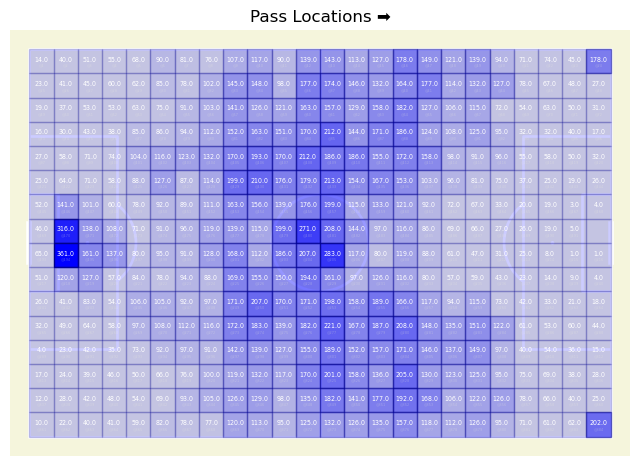

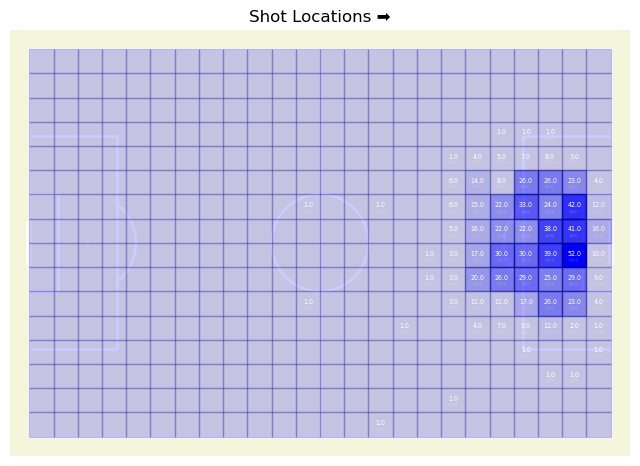

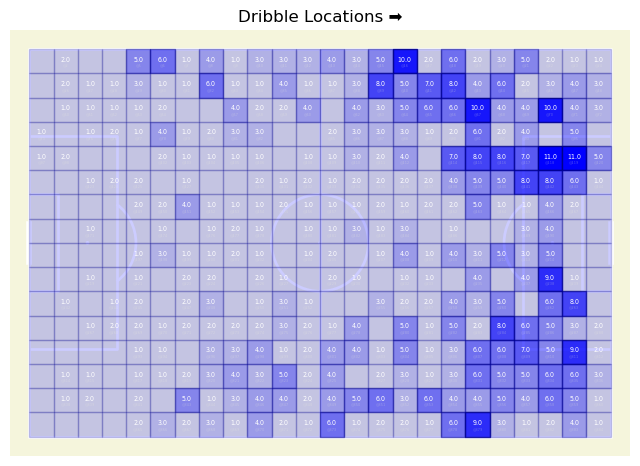

In [28]:
for ATTRIBUTE_TITLE in ATTRIBUTES_LIST:
    counts_df = Generate_counts_df(df, ATTRIBUTE_TITLE)

    def MinMaxNormalization(X):
        min_X = X.min()
        max_X = X.max()
        return (X-min_X) / (max_X-min_X)
    counts_df["alpha"] = MinMaxNormalization(counts_df["count"])
    counts_df.to_csv(f"{file_title}{ATTRIBUTE_TITLE}_locations.csv", index=False) # EXPORT CSV
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color='white')
    fig, ax = plt.subplots(figsize=(8, 12))
    pitch.draw(ax=ax)
    def draw_intervals(df, ax):
        for _, row in df.iterrows():
            x_start, x_end = row['x_interval']
            y_start, y_end = row['y_interval']
            count = row['count']
            percentage = row['percentage']
            pitch_number = row['Pitch_Number']
            alphaValue = row['alpha']
            
            rect = patches.Rectangle(
                (y_start, x_start), 
                y_end - y_start,
                x_end - x_start, 
                linewidth=1,
                edgecolor='darkblue',
                facecolor='blue',
                alpha=max(0.2, alphaValue)
            )
            
            ax.add_patch(rect)
            if count:
                ax.text(
                    (y_start + y_end) / 2,
                    (x_start + x_end) / 2, 
                    f'\n\n{count}',
                    ha='center',
                    fontsize=4.5, color='white'
                )
                ax.text(
                    (y_start + y_end) / 2,
                    (x_start + x_end + 2) / 2, 
                    f'\n@{pitch_number}',
                    ha='center',
                    fontsize=2.5, color="beige",
                    alpha=0.3
                )
    
    draw_intervals(counts_df, ax)
    plt.title(f'{ATTRIBUTE_TITLE} Locations ➡️')
    saved_fig = fig.savefig(f"IMG/{file_title}{ATTRIBUTE_TITLE}_Locations.png", dpi=300, bbox_inches='tight')
    TESTsaved_fig = fig.savefig(f"IMG/statsbomb.png", dpi=300, bbox_inches='tight')
    print(f'{ATTRIBUTE_TITLE} is completed!')